#### Hyperparameters
* Configuration of model init values
* Choice of hyperparameters 

* Choose a class of model
* Choose model hyperparameters
* Fit the model to training data
* Use the model to predict labels for new data

### Model Validation

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
model.fit(X, y) # Training the model
y_model = model.predict(X) 

In [5]:
from sklearn.metrics import accuracy_score
# Evaluating classifiers
accuracy_score(y, y_model)

1.0

### Doing it right way

In [7]:
from sklearn.model_selection import train_test_split

In [15]:
X1, X2, y1, y2 = train_test_split(X,y, random_state = 0, train_size=0.75)

In [16]:
X1.shape

(112, 4)

In [17]:
X2.shape

(38, 4)

In [18]:
model.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [19]:
y2_predict = model.predict(X2)

In [20]:
accuracy_score(y2,y2_predict)

0.97368421052631582

### Model validation via cross-validation

In [21]:
from sklearn.cross_validation import cross_val_score

In [24]:
import numpy as np
np.mean(cross_val_score(model, X,y, cv=5))

0.95999999999999996

In [25]:
cross_val_score(model, X,y, cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

### validation curves in scikit-learn

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [27]:
def Polynomialregression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [28]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

In [32]:
X_test = np.linspace(-0.1, 1.1, 500)[:,None]

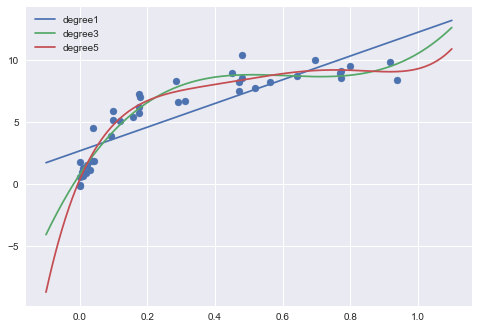

In [43]:
plt.scatter(X.ravel(),y)

axis = plt.axis()
for degree in [1,3,5]:
    y_predict = Polynomialregression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_predict, label='degree{0}'.format(degree))
plt.legend()

In [56]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(Polynomialregression(), X, y,
                                           'polynomialfeatures__degree',degree, cv=7)

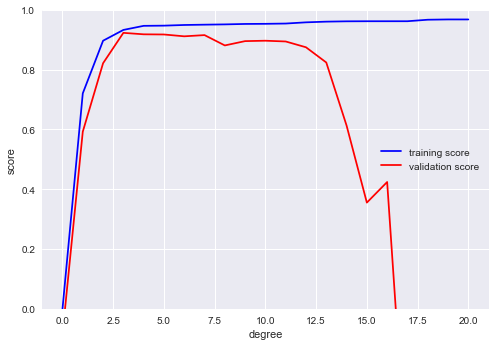

In [58]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
plt.legend(loc='best')

In [61]:
np.median(train_score, 1)

array([ 0.        ,  0.72060505,  0.8966661 ,  0.93273606,  0.94641559,
        0.94706837,  0.94928043,  0.95034312,  0.95126473,  0.9527462 ,
        0.95316414,  0.95410179,  0.95812976,  0.9604493 ,  0.96155007,
        0.9618062 ,  0.96182216,  0.96184623,  0.96687145,  0.9678368 ,
        0.96778453])

In [62]:
train_score.shape

(21, 7)